### Importation de bibliothèques

In [189]:
from scipy.spatial import distance as dist
from matplotlib import pyplot as plt
from imutils import contours
from PIL import Image
import numpy as np
import imutils
import time
import cv2
import math

### Lecture de l'image

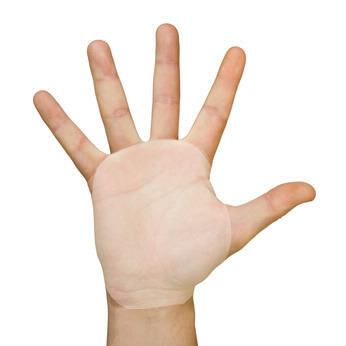

In [190]:
img = cv2.imread("hand1.jpg")
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(im_rgb)

### Transformation d'images 

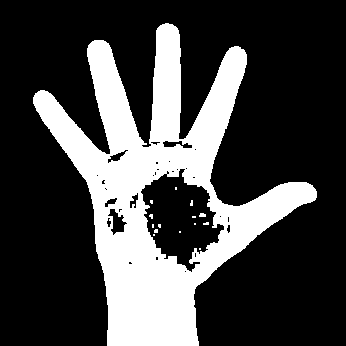

In [191]:
hsvim = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # RGB to hsv
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
skinRegionHSV = cv2.inRange(hsvim, lower, upper)
blurred = cv2.blur(skinRegionHSV, (2,2))
ret, thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
Image.fromarray(thresh)

### Trouver les contours

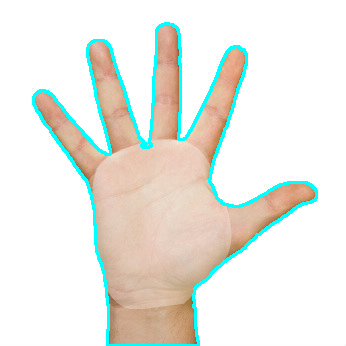

In [192]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv2.contourArea(x))
cv2.drawContours(img, [contours], -1, (255,255,0), 2)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(im_rgb)

### Enveloppe convexe 

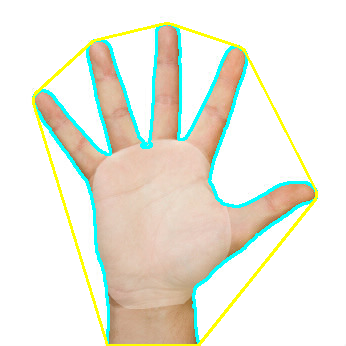

In [193]:
hull = cv2.convexHull(contours)
image = cv2.drawContours(img, [hull], -1, (0, 255, 255), 2)
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
Image.fromarray(im_rgb)

### Défauts de convexité 

In [194]:
hull = cv2.convexHull(contours, returnPoints=False)
defects = cv2.convexityDefects(contours, hull)

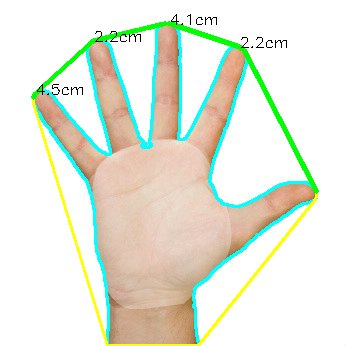

In [195]:
for i in range(defects.shape[0]):
    if i < 10 :
        s,e,f,d = defects[i][0]
    
        start = tuple(contours[s][0])
        end = tuple(contours[e][0])
        far = tuple(contours[f][0])

        #a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)

        ab = dist.euclidean(end, start)

        cv2.line(img, end, start, [0,255,0],3)

        if i > 1 and i % 2 == 1 : 
            cv2.putText(img, "{:.1f}cm".format(ab), far, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(im_rgb)